# # CLASSIFICATION PROBLEM: Titanic DATASET.

In [114]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_theme()
%matplotlib inline

Overview

In [115]:
# Loading the data
df_train = pd.read_csv('train.csv')#891
df_test = pd.read_csv('test.csv')#418
print(df_train.keys())
df_train.head(7)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [116]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [117]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Preliminary data cleansing

What's missing:

In [118]:
# Showing the number of rows having null values and for which attributes
df_train[df_train.columns[df_train.isnull().any()]].isnull().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

# Features

Taking a glimpse at some features

In [119]:
# Number of males and number of females on board
print('Number of males:',df_train['Sex'].value_counts()['male'])
print('Number of females:',df_train['Sex'].value_counts()['female'])

Number of males: 577
Number of females: 314


mean age of females: 27.92
mean age of males: 30.73


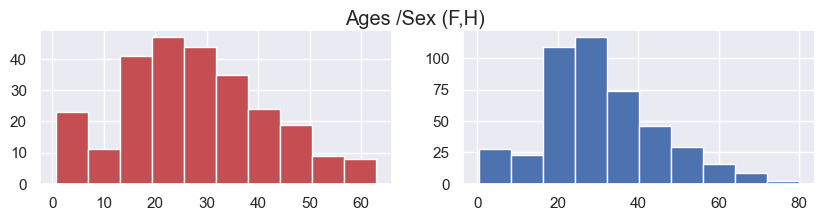

In [120]:
# Treating the NaNs in the 'Age' column
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,2))
ax1.hist(df_train[df_train['Sex']=='female']['Age'],color='r')
ax2.hist(df_train[df_train['Sex']=='male']['Age'],color='b')
fig.suptitle('Ages /Sex (F,H)')

print('mean age of females:',round(df_train[df_train['Sex']=='female']['Age'].mean(),2))#do the NaN values influence these results ?
print('mean age of males:',round(df_train[df_train['Sex']=='male']['Age'].mean(),2))

In [121]:
train, test = df_train.copy(), df_test.copy() #deep copy is True by definition

#train['Age'].fillna(np.nan, inplace=True) # Ensuring null values in 'Sex' col are np.nan

Missing:

In [122]:
#Check that the values have been correctly replaced
train[train.columns[train.isnull().any()]].isnull().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

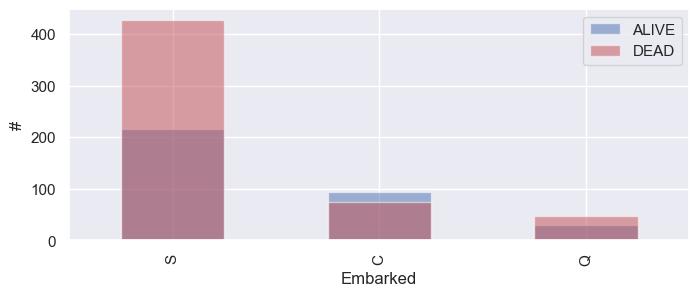

In [123]:
#We can get rid of Embarked but lets check anyway:
Feature = 'Embarked'
fig,ax = plt.subplots(figsize=(8,3))
dff = df_train[['Survived', Feature]]

dff[dff.Survived==1][Feature].value_counts().plot(kind='bar',color='b',alpha=0.5,label='ALIVE')
dff[dff.Survived==0][Feature].value_counts().plot(kind='bar',color='r',alpha=0.5,label='DEAD')
plt.legend(loc='upper right')
plt.xlabel(Feature)
plt.ylabel('#')
plt.show()


# We observed that replacing the np.nan for Age with mean is not so realistic if we replot the histogram below

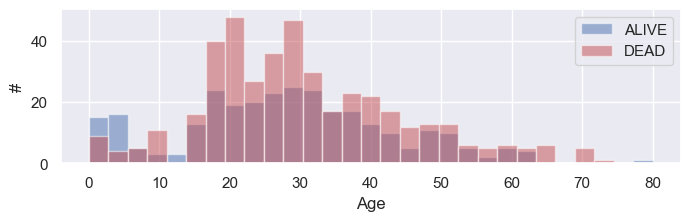

In [124]:
#             Feature analysis 1
Feature = 'Age'
from scipy.stats import norm
fig,ax = plt.subplots(figsize=(8,2))
df_age = df_train[['Survived', Feature ]]#
bins = np.linspace(0,80,30)


plt.hist(df_age[df_age.Survived==1][Feature],bins,alpha=0.5,label='ALIVE',color='b')
plt.hist(df_age[df_age.Survived==0][Feature],bins,alpha=0.5,label='DEAD',color='r')
plt.legend(loc='upper right')
plt.xlabel(Feature)
plt.ylabel('#')
plt.show()



# ALTERNATIVE:

Age

In [125]:
#full_dataset = [df_train.copy(),df_test.copy()]

full_dataset = [train,test]

# Dealing with age NaNs
for dataset in full_dataset:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)# maybe there is better ? by looking at the age distri ?#TODO
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

train.head()    
#full_dataset[0].head(10)
# Making Age column a categorical
# train['CategoricalAge'] = pd.cut(train['Age'], 5)

C:\Users\adrie\AppData\Local\Temp\ipykernel_21220\3678798061.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


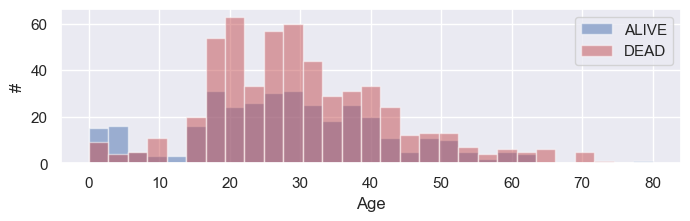

In [126]:
#             Now we look at the distribution

Feature = 'Age'
fig,ax = plt.subplots(figsize=(8,2))
df_age = full_dataset[0][['Survived', Feature]]#
bins = np.linspace(0,80,30)


plt.hist(df_age[df_age.Survived==1][Feature],bins,alpha=0.5,label='ALIVE',color='b')
plt.hist(df_age[df_age.Survived==0][Feature],bins,alpha=0.5,label='DEAD',color='r')
plt.legend(loc='upper right')
plt.xlabel(Feature)
plt.ylabel('#')
plt.show()

# IMPORTANT TO DO CATEGORICAL LABELS AS TO AVOID LOOKING FOR CORRELATION BETWEEN FEATURES FOR THE ALGORITHM

In [14]:
# CATEGORIZING THE Pclass feature: NO NEED AS IT IS LEGITIMATELY CORRELATED TO SOME OTHERS
# On the other hand, we can split in several integers the Fares and also the Age for better significance.

Fare

In [127]:
#Fare into intervals (abus de language ici ?)
train['Fare'] = train['Fare'].astype(float)
test['Fare'] = test['Fare'].astype(float)
for dataset in [train,test]:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3    

train.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,0.0,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,3.0,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,1.0,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,3.0,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,1.0,NaN,S


FamilySize, IsAlone

In [128]:
#Now we take into account the size of the family someone belongs to.
# FamilySize can be the sum of SibSp and Parch + 1
for dataset in full_dataset:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
# Adding anther column for passengers travelling along
for dataset in full_dataset:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
train.head()    
 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,0.0,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,3.0,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,1.0,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,3.0,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,1.0,NaN,S,1,1


Title

In [129]:
# Creation of the Title feature
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

#train['Name_length'] = train['Name'].apply(len)
#test['Name_length'] = test['Name'].apply(len)

full_dataset=[train,test]

for dataset in full_dataset:
    dataset['Title'] = dataset['Name'].apply(get_title)

for dataset in full_dataset:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [130]:
for dataset in full_dataset:
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

Correlation Matrix, in case

In [131]:
#sns.reset_orig()
#corr = train.corr()
#corr.style.background_gradient(cmap='coolwarm')
#sns.heatmap(corr)
#plt.show()

So far:

In [132]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,0.0,NaN,S,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,3.0,C85,C,2,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,1.0,NaN,S,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,3.0,C123,S,2,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,1.0,NaN,S,1,1,1


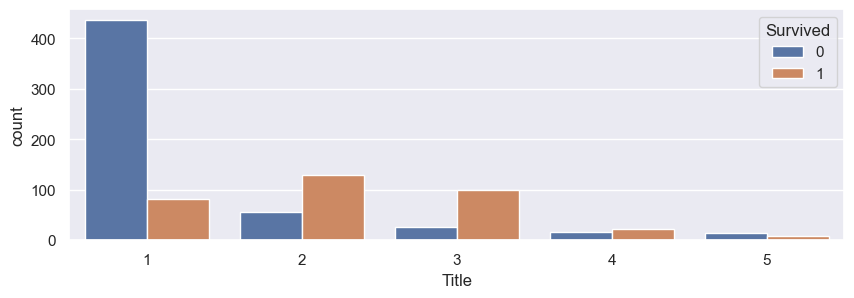

In [133]:
#We look at the Title feature.
fig, ax=plt.subplots(figsize=(10,3))
#graph = sns.countplot(data=full_dataset[0],x='Title')

#sns.countplot(x=train["Title"])

sns.countplot(data=train, x="Title", hue="Survived")

#plt.setp(graph.get_xticklabels(), rotation=45) 
plt.show()

Preliminary nutshell


In [134]:
train[train.columns[train.isnull().any()]].isnull().sum()

Cabin       687
Embarked      2
dtype: int64

In [135]:
# Column: Embarked
for dataset in full_dataset:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
# Column: Fare 
for dataset in full_dataset:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

Age groups

In [136]:
bins= [0,2,6,10,15,20,30,40,50,60,70,80,90]
labels = list(range(len(bins)-1))

train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,0.0,NaN,S,2,0,1,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,3.0,C85,C,2,0,3,6
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,1.0,NaN,S,1,1,2,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,3.0,C123,S,2,0,3,6
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,1.0,NaN,S,1,1,1,6


In [137]:
train.info()
train.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  FamilySize   891 non-null    int64   
 13  IsAlone      891 non-null    int64   
 14  Title        891 non-null    int64   
 15  AgeGroup     891 non-null    category
dtypes: category(1), float64(1), int32(1), int64(8), object(5)
memory usage: 102.3+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,0.0,NaN,S,2,0,1,5


Last changes as to apply the classifiers

In [138]:
train['AgeGroup'] = train['AgeGroup'].astype(int)
test['AgeGroup'] = test['AgeGroup'].astype(int)

train['Sex'] = train['Sex'].replace(['female', 'male'], [0, 1])
test['Sex'] = test['Sex'].replace(['female', 'male'], [0, 1])

# Machine learning

Drop the irrelevant features and converting some column to float/int as to use RandomForestClassifier (Q: is it really needed ?)

In [139]:
#So far we got rid of cabins,Tickets,Embarked. Let's substract them. Including the target feature.

target_feature = 'Survived'

drop_feat = set(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked','Age', target_feature ])

#drop_feat = set(['Embarked', 'Cabin', 'Ticket', 'PassengerId','Name','Parch','SibSp','Name_length','Survived','CategoricalAge'])

useful_feat = list(set(train.keys()) - drop_feat)

useful_feat
train[useful_feat].info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AgeGroup    891 non-null    int32  
 1   FamilySize  891 non-null    int64  
 2   IsAlone     891 non-null    int64  
 3   Pclass      891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Title       891 non-null    int64  
 6   Sex         891 non-null    int64  
dtypes: float64(1), int32(1), int64(5)
memory usage: 45.4 KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,0.0,NaN,S,2,0,1,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,3.0,C85,C,2,0,3,6
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,1.0,NaN,S,1,1,2,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,3.0,C123,S,2,0,3,6
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,1.0,NaN,S,1,1,1,6


In [140]:
from sklearn.model_selection import train_test_split

features = useful_feat

target_feature = 'Survived'

X = train[features]# Features
y = train['Survived']# Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

Preliminary test with the split from the train data

In [141]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier

clf=RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.776536312849162


Now that we know things are working, we can train and test on the provided data.

Model Class to be used with different ML tools for scikit-learn


Tools

In [142]:
# ML Algorithms used 

from sklearn.model_selection import KFold
#K-Folds cross-validator
#Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
#Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

from sklearn.model_selection import cross_val_score
#Evaluate a score by cross-validation.

from sklearn.model_selection import cross_val_predict
#Generate cross-validated estimates for each input data point.
#The data is split according to the cv parameter. Each sample belongs to exactly one test set,
#and its prediction is computed with an estimator fitted on the corresponding training set.

from sklearn.svm import SVC
#C-Support Vector Classification.

Classifiers


In [143]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [144]:
# Model Class to be used for different ML algorithms
class ClassifierModel(object):
    def __init__(self, clf, params=None):
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def predict(self, x):
        return self.clf.predict(x)

Test and Train data

In [145]:
features = useful_feat

target_feature = 'Survived'

features

['AgeGroup', 'FamilySize', 'IsAlone', 'Pclass', 'Fare', 'Title', 'Sex']

In [146]:
x_train = train[features]

y_train = train[target_feature].ravel()

arr_train = train[features].values # Creates an array of the train data
arr_test  = test[features].values # Creats an array of the test data

In [147]:
def trainModel(model, x_train, y_train, x_test, n_folds, seed):
    cv = KFold(n_splits= n_folds, random_state=seed)
    scores = cross_val_score(model.clf, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    y_pred = cross_val_predict(model.clf, x_train, y_train, cv=cv, n_jobs=-1)
    return scores, y_pred

Random Forest Classifier

In [148]:
# Random Forest parameters
rf_params = {
    'n_estimators': 400,
    'max_depth': 5,
    'min_samples_leaf': 3,
    'max_features' : 'sqrt',
}

rfc_model = ClassifierModel(clf=RandomForestClassifier, params=rf_params)

rfc_scores, rfc_train_pred = trainModel(rfc_model,x_train, y_train, arr_test, 5, None) 

rfc_scores.mean()

0.8271420500910175

# -> OVERALL SCORE (RANDOM FOREST) (~5s) = 82.7%

Feature relevance

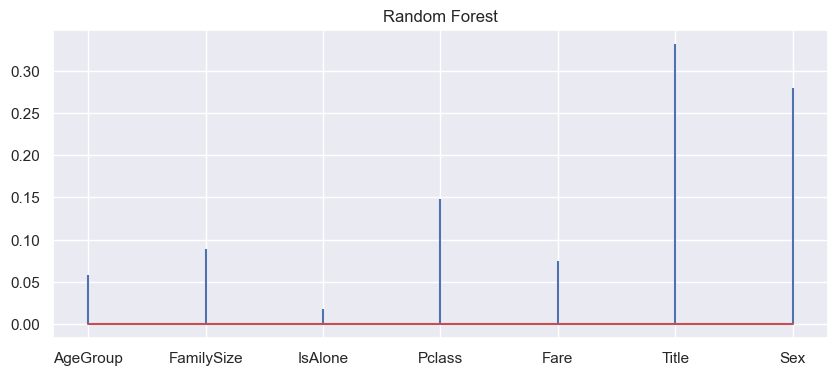

In [149]:
rfc_features = rfc_model.feature_importances(x_train,y_train)

fig, ax = plt.subplots(figsize=(10,4))

ax.stem(x_train.keys(), rfc_features, markerfmt=' ')
plt.title('Random Forest')
plt.show()


In [150]:
rfc_train_pred[:50]

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1], dtype=int64)

# Extra Trees Classifier 


Supposedly faster than a Random Forest Classifier

In [175]:
# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':400,
    'max_depth': 5,
    'min_samples_leaf': 2,
}
etc_model = ClassifierModel(clf=ExtraTreesClassifier, params=et_params)
etc_scores, etc_train_pred = trainModel(rfc_model,x_train, y_train, arr_test, 5, None) 
etc_scores

array([0.84357542, 0.83146067, 0.8258427 , 0.79213483, 0.85955056])

# OVERALL SCORE WITH EXTRA TREES CLASSIFIER (~3s, 2x faster) = 82.6%

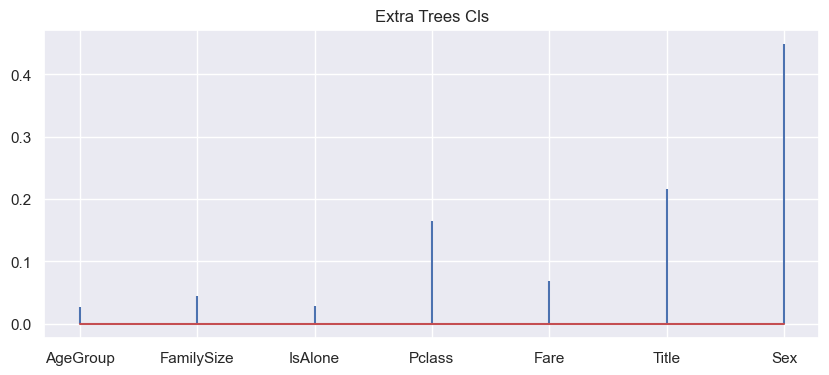

In [153]:
etree_features = etc_model.feature_importances(x_train,y_train)

fig, ax = plt.subplots(figsize=(10,4))

ax.stem(x_train.keys(), etree_features, markerfmt=' ')
plt.title('Extra Trees Cls')
plt.show()


# AdaBoost Classifier

In [176]:
# AdaBoost parameters
ada_params = {
    'n_estimators': 400,
    'learning_rate' : 0.65
}
ada_model = ClassifierModel(clf=AdaBoostClassifier, params=ada_params)
ada_scores, ada_train_pred = trainModel(ada_model,x_train, y_train, arr_test, 5, None) # Random Forest
ada_scores

array([0.81005587, 0.83146067, 0.79213483, 0.7752809 , 0.84269663])

# OVERALL SCORE WITH Ada Boost  = 81%

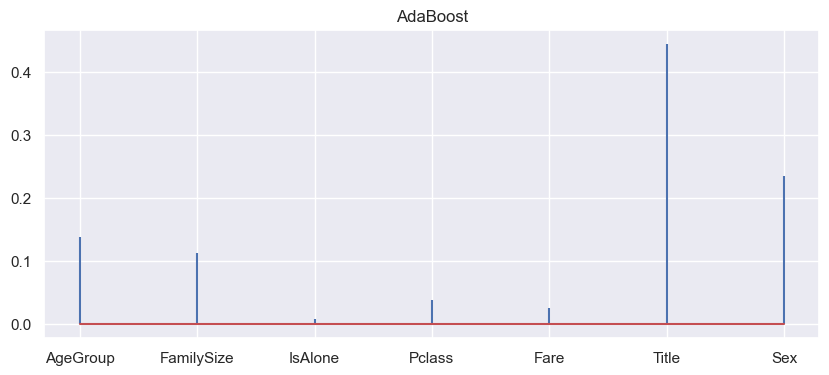

In [178]:
ada_features = ada_model.feature_importances(x_train,y_train)

fig, ax = plt.subplots(figsize=(10,4))

ax.stem(x_train.keys(), ada_features, markerfmt=' ')
plt.title('AdaBoost')
plt.show()

# XGBOOST CLASSIFIER (xD)

In [157]:
import xgboost as xgb

In [158]:
# Gradient Boosting parameters
gb_params = {
    'n_estimators': 400,
    'max_depth': 6,
}
gbc_model = ClassifierModel(clf=GradientBoostingClassifier, params=gb_params)
gbc_scores, gbc_train_pred = trainModel(gbc_model,x_train, y_train, arr_test, 5, None) 
gbc_scores

array([0.75977654, 0.7752809 , 0.8258427 , 0.79775281, 0.84269663])

#very quick with 80%

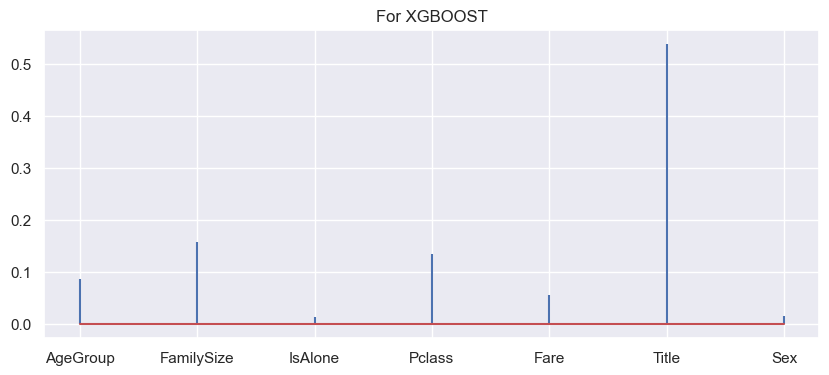

In [159]:
gb_features = gbc_model.feature_importances(x_train,y_train)

fig, ax = plt.subplots(figsize=(10,4))

ax.stem(x_train.keys(), gb_features, markerfmt=' ')
plt.title('For XGBOOST')
plt.show()

# Support Vector Classifier

In [104]:
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }
svc_model = ClassifierModel(clf=SVC, params=svc_params)
svc_scores, svc_train_pred = trainModel(svc_model,x_train, y_train, arr_test, 5, None) 
svc_scores

array([0.81005587, 0.80898876, 0.81460674, 0.79213483, 0.84269663])

# much quicker with 81% precision

# OVERALL FEATURE ANALYSIS

In [180]:
feature_dataframe = pd.DataFrame( {'features': train[features].columns.values,
    'Random Forest feature importances': rfc_features,
    'Extra Trees  feature importances': etree_features,
    'AdaBoost feature importances': ada_features,
    'Gradient Boost feature importances': gb_features
    })
# Create the new column containing the average of values
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe

C:\Users\adrie\AppData\Local\Temp\ipykernel_21220\2760959783.py:8: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,features,Random Forest feature importances,Extra Trees feature importances,AdaBoost feature importances,Gradient Boost feature importances,mean
0,AgeGroup,0.057387,0.027518,0.1375,0.086641,0.077262
1,FamilySize,0.088926,0.044089,0.1125,0.156698,0.100553
2,IsAlone,0.017555,0.027836,0.0075,0.013337,0.016557
3,Pclass,0.148252,0.165572,0.0375,0.134689,0.121503
4,Fare,0.075071,0.068752,0.0250,0.055187,0.056003
5,Title,0.332436,0.217003,0.4450,0.538904,0.383336
6,Sex,0.280374,0.449229,0.2350,0.014543,0.244786


## END